In [38]:
#importação de bibliotecas
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import matplotlib
import seaborn as sns 
import pandas_profiling

In [39]:
#importação do arquivo e gerando um dataframe em pandas
arquivo = 'kc_house_data.csv'
df = pd.read_csv(arquivo, sep=',',header=0)

 * **sqrt_lot** -- tamanho do terreno 
 * **sqrt_living** -- área construída
 * **bathrooms** -- Número de banheiros, onde 0,5 corresponde a um quarto com banheiro, mas sem chuveiro

In [40]:
# Consultar as primeiras 5 linhas
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [41]:
#informações sobre as colunas, o tipo de dado. O numero de linhas correspinde ao número de linhas não nulas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [42]:
# Consultar se há algum valor nulo dentro do dataset
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [43]:
# Caso houvesse, bastaria fazer a exclusão
#df.dropna(inplace=True)

## Matriz de Correlação

Mede se há e qual o grau de dependência entre variáveis, ou seja, o quanto uma variável interfere em outra, lembrando que essa relação de dependência pode ou não ser causal.
A análise de correlação vai retornar três possíveis cenários: 
&nbsp;
1. correlação positiva; quando duas variáveis que possuem correlação crescem ou decrescem juntas, ou seja, que possuem uma relação direta;
2. correlação negativa; quando duas variáveis que possuem correlação mas quando uma variável cresce a outra decresce, ou vice-versa;
3. não há correlação. quando o crescimento ou decrescimento de uma variável não tem efeito sobre outra variável.
&nbsp;
* ρ = 0,9 a 1 (positivo ou negativo): correlação muito forte;
* ρ = 0,7 a 09 (positivo ou negativo): correlação forte;
* ρ = 0,5 a 0,7 (positivo ou negativo): correlação moderada;
* ρ = 0,3 a 0,5 (positivo ou negativo): correlação fraca;
* ρ = 0 a 0,3 (positivo ou negativo): não possui correlação.

<AxesSubplot:>

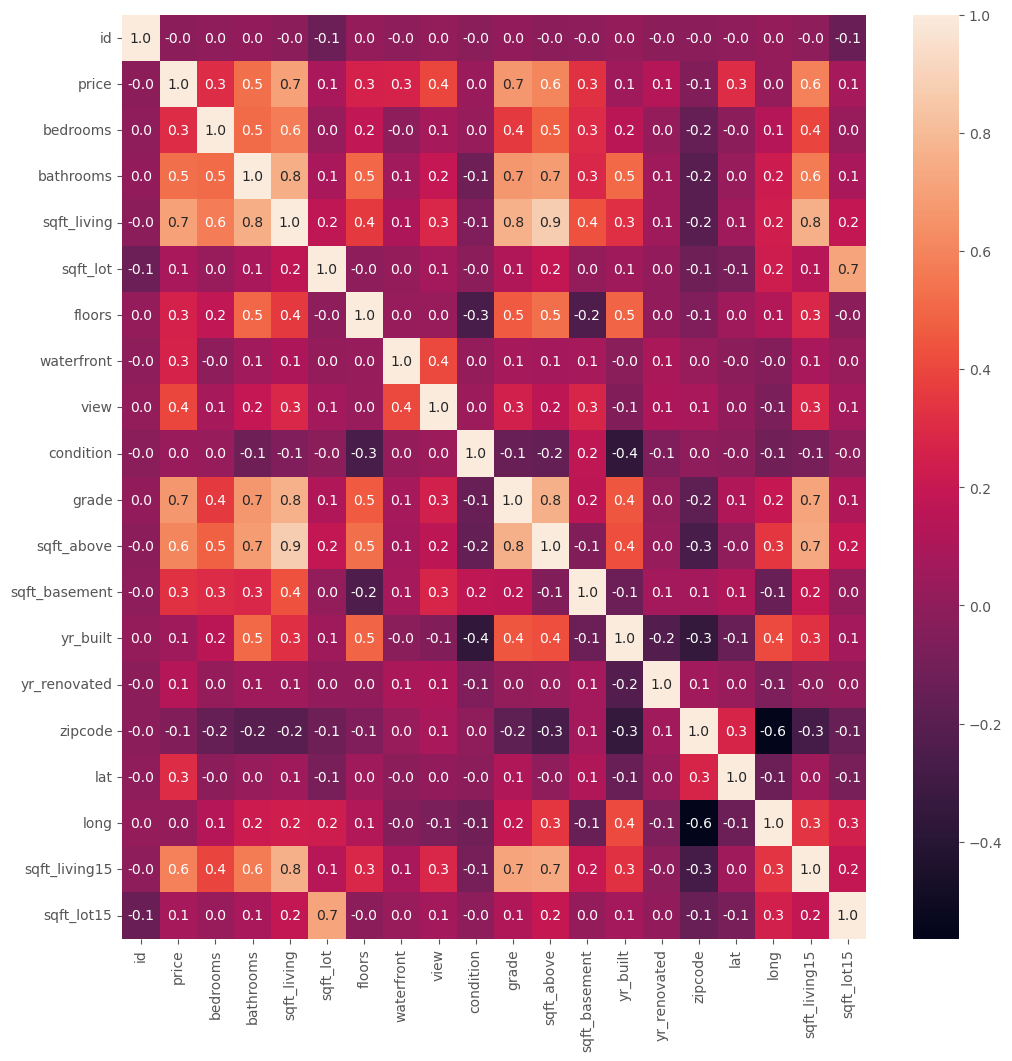

In [44]:
#matriz de correlação
correlacao = df.corr()
plt.figure(figsize = (12,12))
sns.heatmap(correlacao, annot=True, fmt ='.1f')

In [79]:
# Colunas = id, price, bedrooms, bathrooms, grade, sqft_above
dataset = pd.read_csv(arquivo, sep =',', usecols=['id', 'price', 'bedrooms', 'bathrooms', 'grade', 'sqft_living', 'waterfront', 'view'])

<AxesSubplot:>

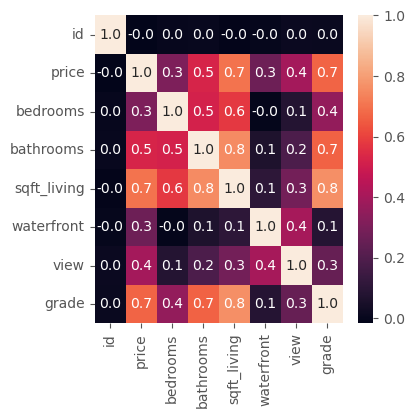

In [80]:
#matriz de correlação
correlacao = dataset.corr()
plt.figure(figsize = (4,4))
sns.heatmap(correlacao, annot=True, fmt ='.1f')

Há uma relação entre:
* Preço x Área construída - Correlação entre 0,7 e 1 (positiva ou negativa) temos a ideia de que quanto maior a area construída, maior ou valor. O contrário também vale. 
* Banheiros x Quartos X Preço - Corelação positiva;

## Outliers

São valores que se desviam de outras observações dos dados

In [47]:
#verificar valore máximo na coluna price 
dataset.price.max()

7700000.0

In [48]:
#verificar valor mínimo na coluna price 
dataset.price.min()

75000.0

In [49]:
#verificar média dos preços
dataset.price.mean()

540088.1417665294

<AxesSubplot:>

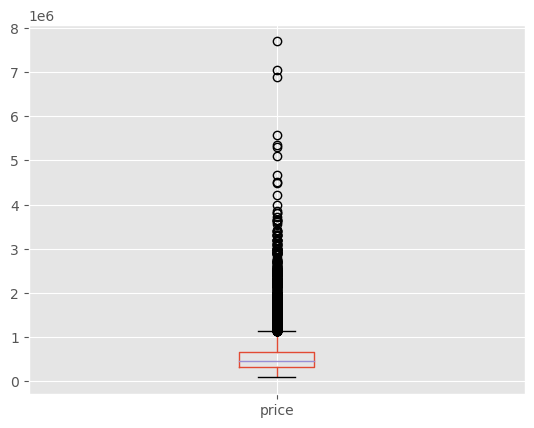

In [50]:
#verificar outliers com o gráfico de box 
matplotlib.style.use('ggplot')
dataset.boxplot(column='price')

É possível observar no gráfico acima, que a variabilidade de preços de casas é pequena. Comparado a alguns casos onde é possível ver um outliers de casas, com valores bem acima da média. Mas, considerando que são casas, estes outliers não irá interferir na análise. 

## Gráficos

array([[<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>]], dtype=object)

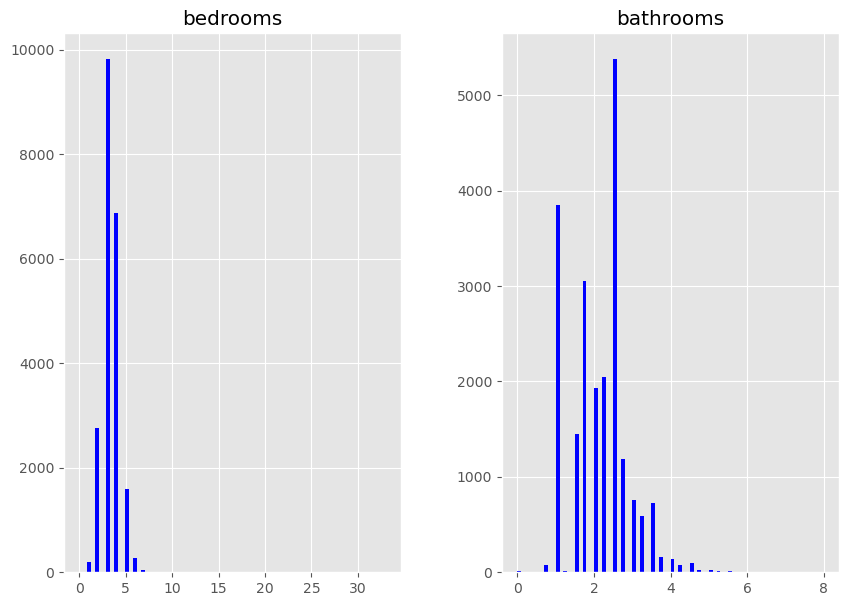

In [90]:
# Histograma de gráficos de banheiros e quartos 
dataset[['bedrooms', 'bathrooms']].hist(bins=80, alpha=1.0, color='blue', figsize=(10,7))

* Bedrooms - A maioria das casas possuem entre 1 e 5 quartos (considerando 3 quartos o maior número)
* Bathroom - entre 2 e 4 banheiros. 

<AxesSubplot:title={'center':'Preços x Nº de Quartos'}, xlabel='bedrooms', ylabel='price'>

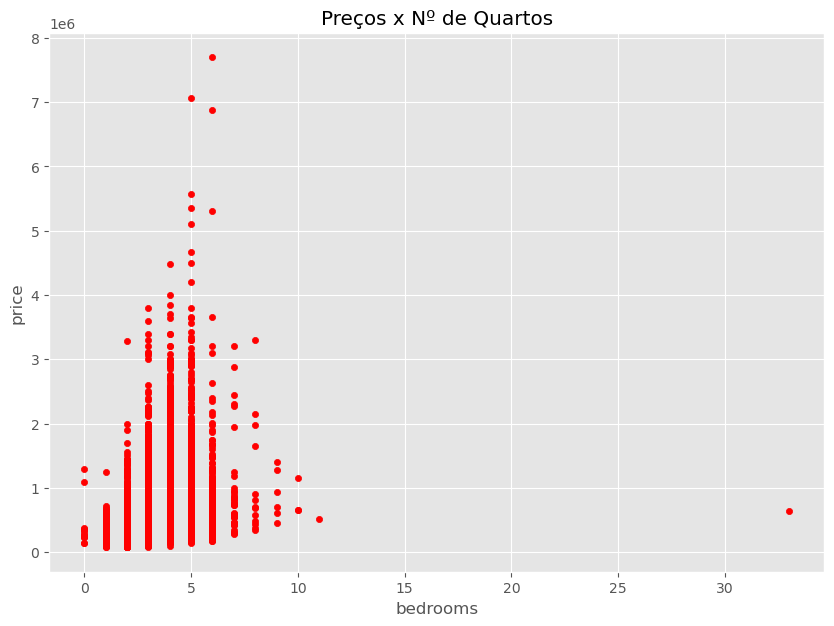

In [92]:
#gráfico de dispersão entre o número de quartos e o preço. 
dataset.plot(x='bedrooms', y='price', kind='scatter', title='Preços x Nº de Quartos', color='red',figsize=(10,7))

<AxesSubplot:title={'center':'Preços x Nº de Banheiros'}, xlabel='bathrooms', ylabel='price'>

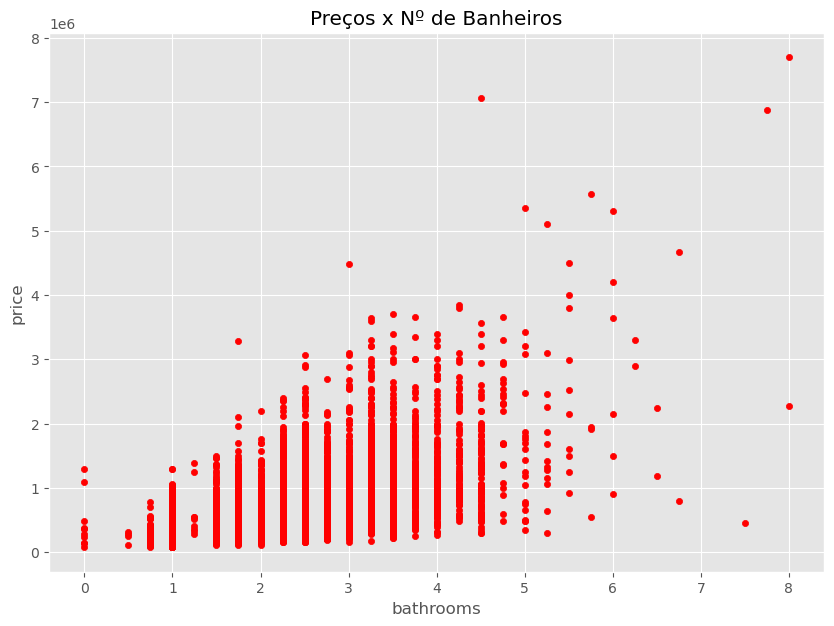

In [93]:
# Gráfico de dipersão entre o número de banheiros e o preço.
dataset.plot(x='bathrooms', y='price', kind='scatter', title='Preços x Nº de Banheiros', color='red', figsize=(10,7))

<AxesSubplot:title={'center':'Preços x Área construída'}, xlabel='sqft_living', ylabel='price'>

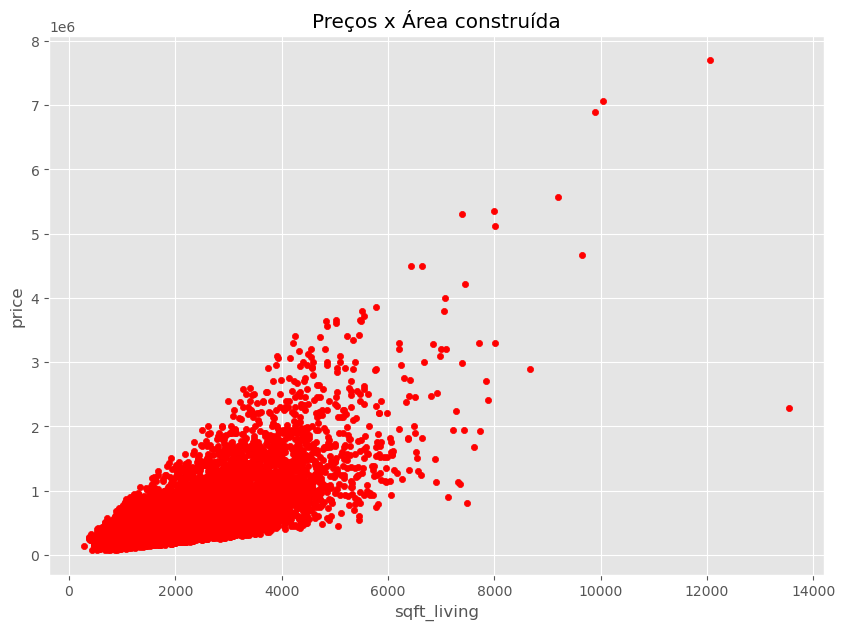

In [94]:
#gráfico de dispersão ente o preço e o tamanho da casa 
dataset.plot(x='sqft_living', y='price', kind='scatter', title='Preços x Área construída', color='red', figsize=(10,7))

<AxesSubplot:title={'center':'Pé na Areia x Preços'}, xlabel='waterfront', ylabel='price'>

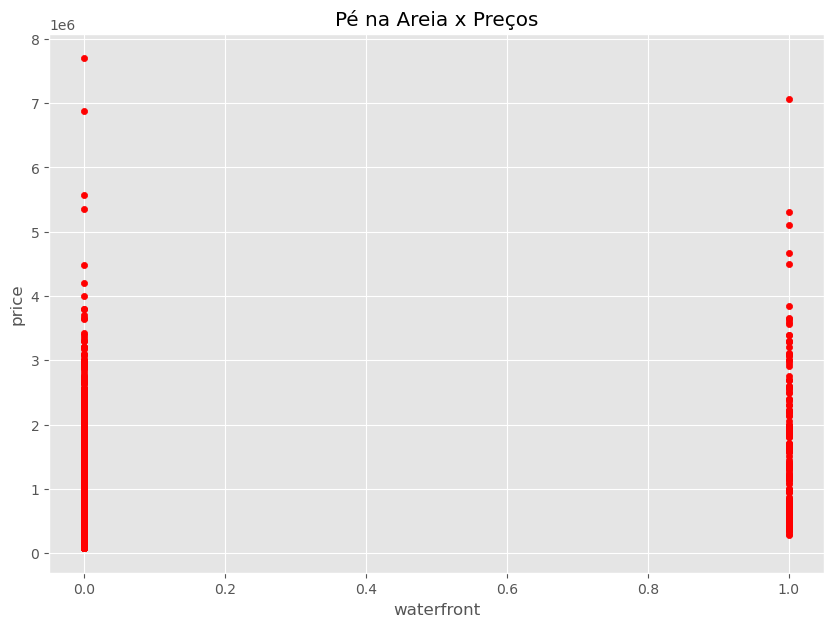

In [95]:
dataset.plot(x='waterfront', y='price', kind='scatter', title='Pé na Areia x Preços', color='red', figsize=(10,7))


In [84]:
dataset['waterfront_labels'] = pd.cut(
    dataset['waterfront'],
    2,
    labels=['Sim', 'Não']
)

In [85]:
#incluir uma coluna com a classificação
dataset['sqft_labels'] = pd.cut(
    dataset['sqft_living'],
    5,
    labels=['Muito Pequeno', 'Pequeno', 'Médio', 'Grande', 'Muito Grande']
    )

In [86]:
#incluir uma coluna com a classificação
dataset['view_labels'] = pd.cut(
    dataset['view'],
    5,
    labels=['Muito Ruim', 'Ruim', 'Bom', 'Muito Bom', 'Excelente']
    )

**CUT** é uma função para passar de uma variável contínua para uma variável categórica. Por exemplo, cortar pode converter idades em grupos de faixas etárias. E le é capaz de fazer as classficações com bases nos valores que estão sendo comparados, no caso a área construída. 

In [87]:
dataset.head(1000)

,id,price,bedrooms,bathrooms,sqft_living,waterfront,view,grade,view_labels,waterfront_labels,sqft_labels
0,7129300520,221900.0,3,1.00,1180,0,0,7,Muito Ruim,Sim,Muito Pequeno
1,6414100192,538000.0,3,2.25,2570,0,0,7,Muito Ruim,Sim,Muito Pequeno
2,5631500400,180000.0,2,1.00,770,0,0,6,Muito Ruim,Sim,Muito Pequeno
3,2487200875,604000.0,4,3.00,1960,0,0,7,Muito Ruim,Sim,Muito Pequeno
4,1954400510,510000.0,3,2.00,1680,0,0,8,Muito Ruim,Sim,Muito Pequeno
...,...,...,...,...,...,...,...,...,...,...,...
995,7437100570,291000.0,4,2.50,1860,0,0,7,Muito Ruim,Sim,Muito Pequeno
996,8856004730,199950.0,2,2.75,1590,0,0,5,Muito Ruim,Sim,Muito Pequeno
997,3856902996,553500.0,2,1.00,850,0,0,7,Muito Ruim,Sim,Muito Pequeno
998,1442800370,189950.0,2,1.00,1030,0,0,8,Muito Ruim,Sim,Muito Pequeno


In [59]:
# Value counts é utilizado para sabe o número de imóveis por categoria. 
# Tamanho
dataset.sqft_labels.value_counts()

Muito Pequeno    18284
Pequeno           3221
Médio              101
Grande               5
Muito Grande         2
Name: sqft_labels, dtype: int64

In [88]:
# Value counts é utilizado para sabe o número de imóveis por categoria. 
# Vista para a água
dataset.waterfront_labels.value_counts()


Sim    21450
Não      163
Name: waterfront_labels, dtype: int64

In [89]:
# Value counts é utilizado para sabe o número de imóveis por categoria. 
# Nota para a vista da casa
dataset.view_labels.value_counts()

Muito Ruim    19489
Bom             963
Muito Bom       510
Ruim            332
Excelente       319
Name: view_labels, dtype: int64

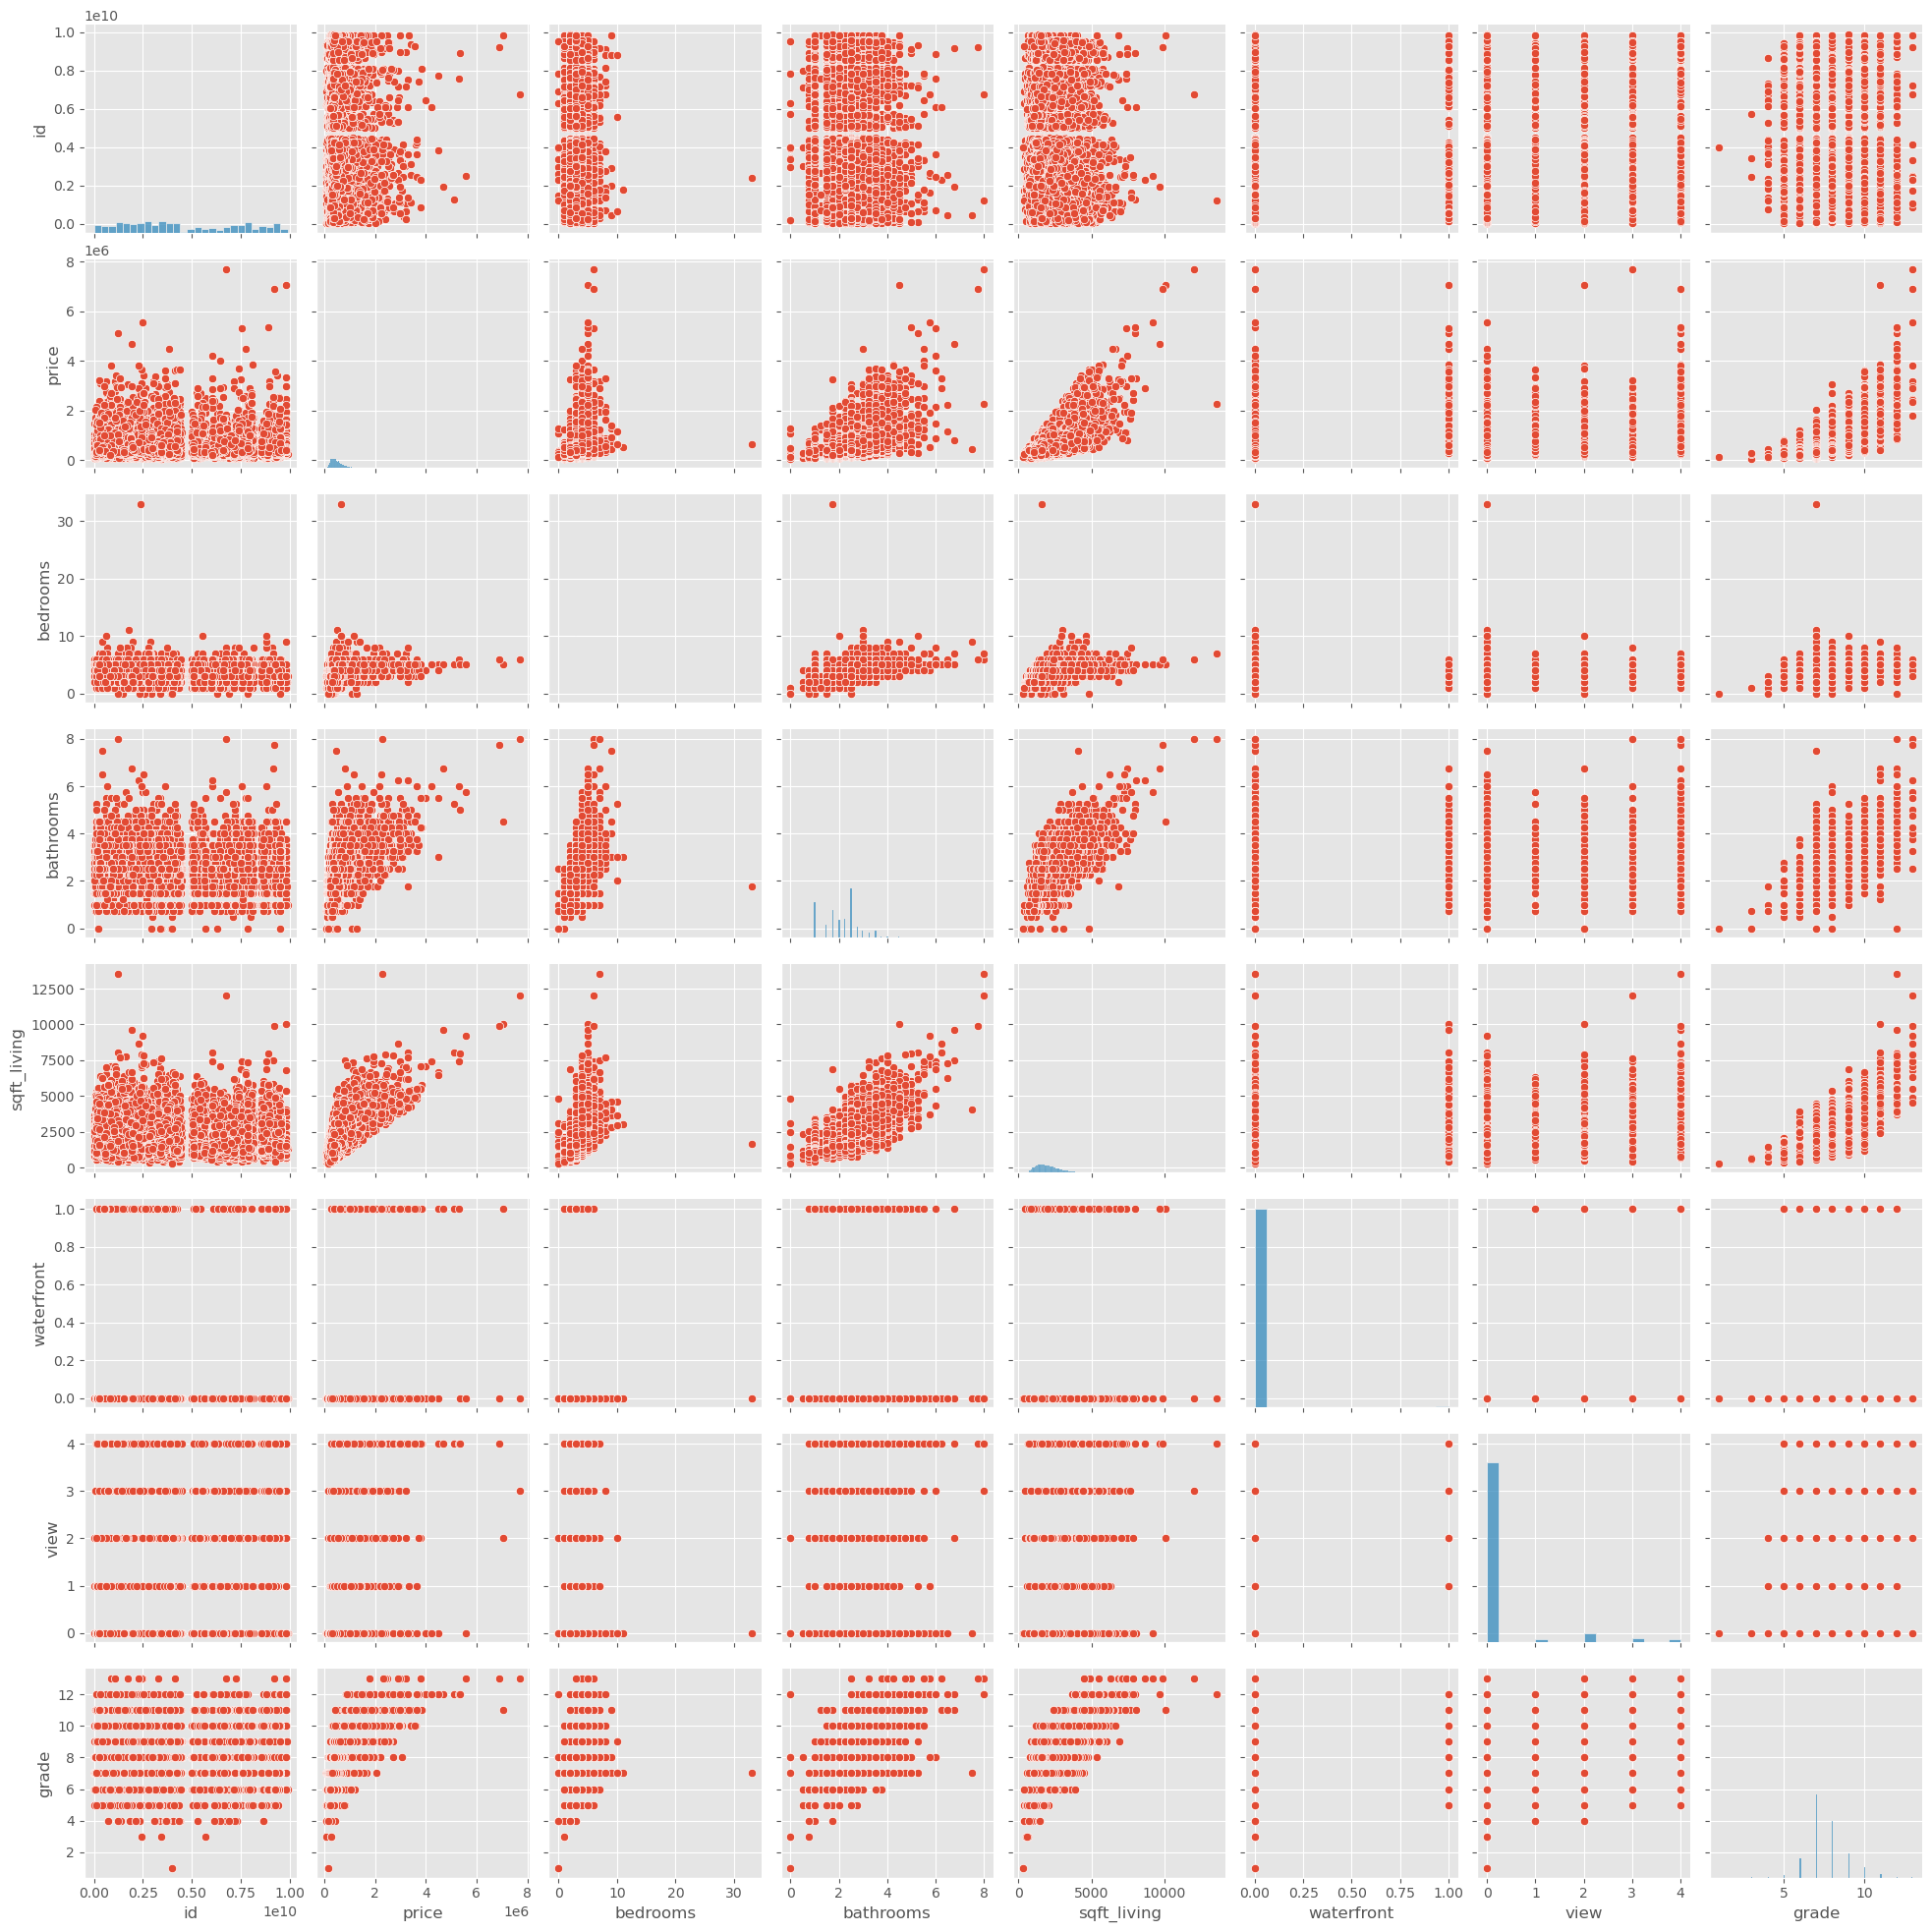

In [77]:
# A biblioteca para plotar gráficos e histogramas cruzados das variáveis demonstrando as suas relações e os históricos destas numa só visualização.

sns.pairplot(dataset)

## Análises

* Seatle é uma cidade cercada de água, portanto, é possível observar que o valor independe de ser em frete ou não do mar, o valor sirá ser na média;
* O número de quartos, assim como a área construída influencia no valor do imóvel; 
* Já o número de banheiros, não interfere muito no valor. 

Esse tipo de análise pode ajudar o setor imobiliário a se ajustar aos desejos dos compradores sem ter que perder tempo demonstrando várias residências que não se aplicam nem aos orçamentos dos seus clientes, nem aos interesses desses com relação aos designs das casas e apartamentos.